In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.ensemble import RandomForestClassifier
# sklearn.metrics의 모든 필요한 함수들을 한 줄로 임포트
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_samples, silhouette_score

from scipy.stats import boxcox

import warnings
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler


# 1. 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 2. 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_csv('first_df.csv')

In [6]:
df.head()

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Stress_Level,BMI_Category,Heart Rate_,Systolic,Diastolic
0,0,75,4,7.0,3,3,2,84.0,142.0,71.5
1,1,70,4,6.0,2,3,1,60.0,131.0,84.0
2,1,42,3,7.6,3,3,1,72.0,103.0,60.5
3,1,52,4,7.0,3,3,1,86.0,139.0,62.0
4,0,43,1,7.3,2,3,2,72.0,131.0,95.0


# 1단계 데이터 준비 및 탐색적 데이터 분석

## 1. 데이터 불러오기 및 기본정보 확인

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7303 non-null   int64  
 1   Age               7303 non-null   int64  
 2   Occupation        7303 non-null   object 
 3   Sleep_Duration    7303 non-null   float64
 4   Quality_of_Sleep  7303 non-null   int64  
 5   Stress_Level      7303 non-null   int64  
 6   BMI_Category      7303 non-null   int64  
 7   Heart Rate_       7303 non-null   float64
 8   Systolic          7303 non-null   float64
 9   Diastolic         7303 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 570.7+ KB


In [8]:
df.describe()

,Gender,Age,Sleep_Duration,Quality_of_Sleep,Stress_Level,BMI_Category,Heart Rate_,Systolic,Diastolic
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,0.551280,47.937697,6.733657,3.533753,3.026564,1.768999,72.484185,118.576818,73.030262
std,0.497397,20.905379,1.063025,1.355544,0.960522,0.864031,8.397691,15.250081,9.724399
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,38.000000,76.500000,43.000000
25%,0.000000,33.000000,6.000000,3.000000,3.000000,1.000000,68.000000,108.000000,66.000000
50%,1.000000,51.000000,7.000000,3.000000,3.000000,1.000000,72.000000,116.000000,71.500000
75%,1.000000,65.000000,7.000000,4.000000,3.000000,3.000000,76.000000,127.000000,79.500000
max,1.000000,80.000000,12.000000,9.000000,8.000000,3.000000,200.000000,233.500000,129.500000


In [9]:
df.isnull().sum()

Gender              0
Age                 0
Occupation          0
Sleep_Duration      0
Quality_of_Sleep    0
Stress_Level        0
BMI_Category        0
Heart Rate_         0
Systolic            0
Diastolic           0
dtype: int64

### 'Heart Rate_'컬럼명 변경

In [10]:
df = df.rename(columns={'Heart Rate_': 'Heart_Rate'})
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep_Duration', 'Quality_of_Sleep',
       'Stress_Level', 'BMI_Category', 'Heart_Rate', 'Systolic', 'Diastolic'],
      dtype='object')

In [11]:
 df['Occupation'].unique()

array(['4', '3', '1', '2', 'Other'], dtype=object)

## 'Occupation' 컬럼에서 'Other' 값을 5로 변경

In [12]:
df['Occupation'] = df['Occupation'].replace('Other', 5)
# 문자열 형태의 숫자도 정수형으로 변환
df['Occupation'] = df['Occupation'].astype(int)

In [13]:
 df['Occupation'].unique()

array([4, 3, 1, 2, 5])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7303 non-null   int64  
 1   Age               7303 non-null   int64  
 2   Occupation        7303 non-null   int64  
 3   Sleep_Duration    7303 non-null   float64
 4   Quality_of_Sleep  7303 non-null   int64  
 5   Stress_Level      7303 non-null   int64  
 6   BMI_Category      7303 non-null   int64  
 7   Heart_Rate        7303 non-null   float64
 8   Systolic          7303 non-null   float64
 9   Diastolic         7303 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 570.7 KB


In [15]:
display(df.head())

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Stress_Level,BMI_Category,Heart_Rate,Systolic,Diastolic
0,0,75,4,7.0,3,3,2,84.0,142.0,71.5
1,1,70,4,6.0,2,3,1,60.0,131.0,84.0
2,1,42,3,7.6,3,3,1,72.0,103.0,60.5
3,1,52,4,7.0,3,3,1,86.0,139.0,62.0
4,0,43,1,7.3,2,3,2,72.0,131.0,95.0


## 목표 변수(y)와 특성 변수(x) 정의 (Define Target & Features)
* 목표 변수(y) : 'Quality of Sleep'
* 특성 변수(x) : 목표 변수를 제외한 모든 컬럼

In [16]:
# 목표 변수 (y) 지정
y = df['Quality_of_Sleep']

# 특성 변수 (X) 지정 (목표 변수 컬럼 제외)
X = df.drop('Quality_of_Sleep', axis=1)

print("목표 변수 (y) 형태:", y.shape)
print("특성 변수 (X) 형태:", X.shape)

목표 변수 (y) 형태: (7303,)
특성 변수 (X) 형태: (7303, 9)


## 탐색적 데이터 분석 EDA

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7303 non-null   int64  
 1   Age               7303 non-null   int64  
 2   Occupation        7303 non-null   int64  
 3   Sleep_Duration    7303 non-null   float64
 4   Quality_of_Sleep  7303 non-null   int64  
 5   Stress_Level      7303 non-null   int64  
 6   BMI_Category      7303 non-null   int64  
 7   Heart_Rate        7303 non-null   float64
 8   Systolic          7303 non-null   float64
 9   Diastolic         7303 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 570.7 KB


### 타겟 분포를 보기 위한 'Quality_of_Sleep' 컬럼의 히스토그램

In [19]:
df_copy = df.copy()

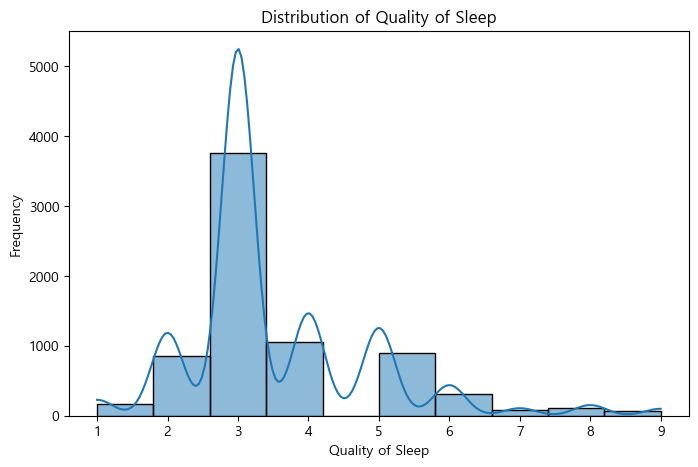

In [20]:
# 'Quality_of_Sleep' 컬럼의 히스토그램 그리기
plt.figure(figsize=(8, 5))
sns.histplot(data=df_copy, x='Quality_of_Sleep', bins=10, kde=True)
plt.title('Distribution of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

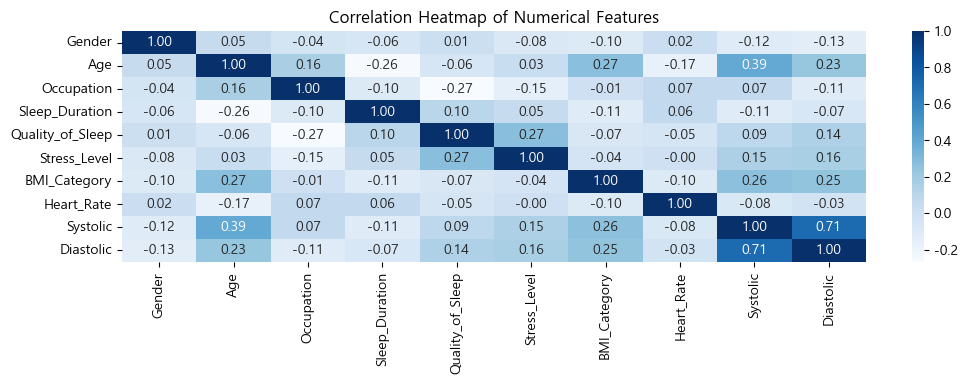

In [21]:
# 숫자형 컬럼만 다시 선택
numerical_cols = df.select_dtypes(include=np.number).columns

# 숫자형 데이터프레임 생성
df_numerical = df[numerical_cols]

# 시각화
plt.figure(figsize=(12, 3))
sns.heatmap(df_numerical.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

* 상관관계 분석을 통해 수축기와 이완기 혈압이 강한 상관관계를 가져 분류모델 학습 시 다중공선성이 있을 수 있다.
* 타겟 데이터가 수면의 질 분석이기 때문에 수축 혈압과 이완 혈압이 각각보다 평균혈압(MAP) 혹은 야간 혈압 변화량을 더 많이 사용한다고 한다.

In [22]:
# 평균 혈압 (MAP) 계산 및 컬럼 추가
# MAP = Diastolic + 1/3 * (Systolic - Diastolic)
df_copy['MAP'] = df_copy['Diastolic'] + (1/3) * (df_copy['Systolic'] - df_copy['Diastolic'])

# 결과 확인
display(df_copy[['Systolic', 'Diastolic', 'MAP']].head())
display(df_copy.info())

,Systolic,Diastolic,MAP
0,142.0,71.5,95.000000
1,131.0,84.0,99.666667
2,103.0,60.5,74.666667
3,139.0,62.0,87.666667
4,131.0,95.0,107.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7303 non-null   int64  
 1   Age               7303 non-null   int64  
 2   Occupation        7303 non-null   int64  
 3   Sleep_Duration    7303 non-null   float64
 4   Quality_of_Sleep  7303 non-null   int64  
 5   Stress_Level      7303 non-null   int64  
 6   BMI_Category      7303 non-null   int64  
 7   Heart_Rate        7303 non-null   float64
 8   Systolic          7303 non-null   float64
 9   Diastolic         7303 non-null   float64
 10  MAP               7303 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 627.7 KB


None

### 범주형과 연속형 컬럼 구분
* 범주형 : Gender, Occupation, BMI_Category, Stress_Level
* 연속형 : Age, Sleep_Duration, Quality_of_Sleep, Heart_Rate, Systolic, Diastolic, MAP(평균혈압)

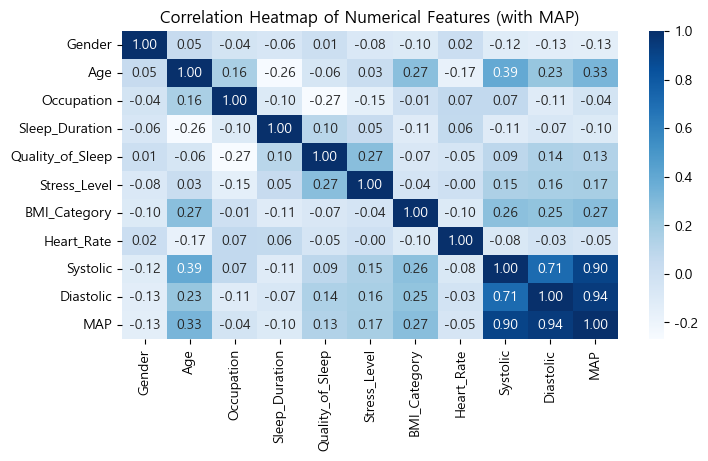

In [23]:
# 숫자형 컬럼만 다시 선택 (MAP 컬럼 포함)
numerical_cols_updated = df_copy.select_dtypes(include=np.number).columns

# 숫자형 데이터프레임 생성
df_numerical_updated = df_copy[numerical_cols_updated]

# 상관관계 행렬 계산
corr_matrix_updated = df_numerical_updated.corr()

# 히트맵 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix_updated, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features (with MAP)')
plt.show()

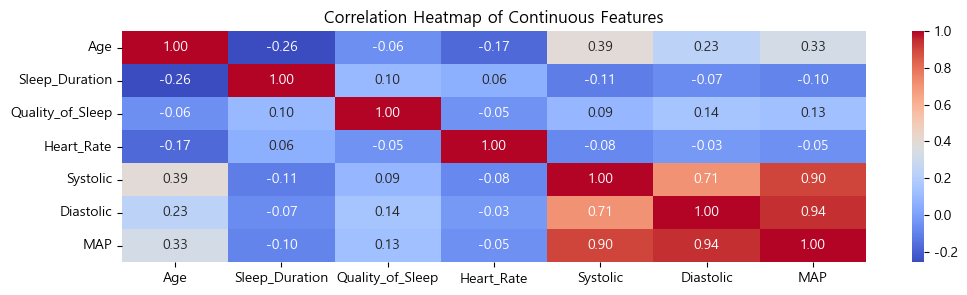

In [24]:
# 연속형 컬럼 목록
continuous_cols = ['Age', 'Sleep_Duration', 'Quality_of_Sleep', 'Heart_Rate', 'Systolic', 'Diastolic', 'MAP']

# 연속형 컬럼만 선택
df_continuous = df_copy[continuous_cols]

# 상관관계 행렬 계산
corr_matrix_continuous = df_continuous.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 3))
sns.heatmap(corr_matrix_continuous, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

### 범주형 컬럼들의 박스 플롯을 통한 수면의 질과의 관계 분석

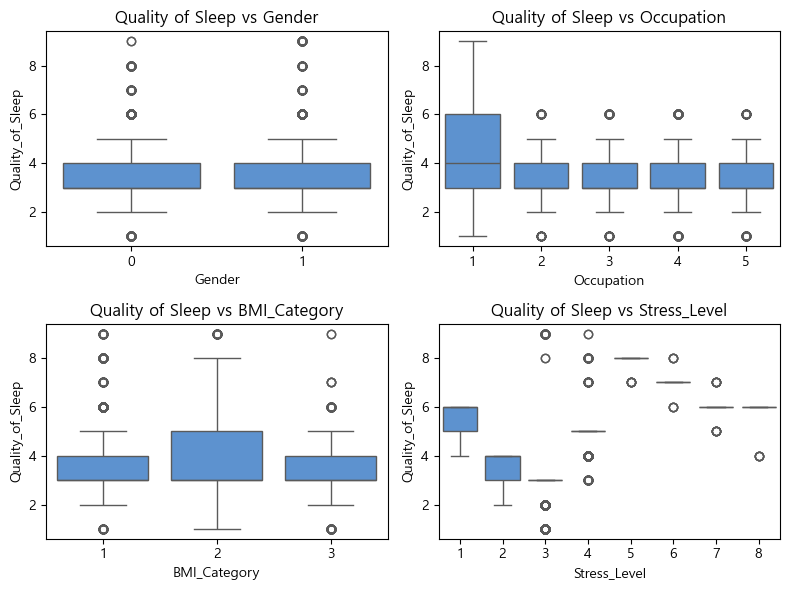

In [25]:
categorical_cols = ['Gender', 'Occupation', 'BMI_Category', 'Stress_Level']
target_col = 'Quality_of_Sleep'

# 2x2 격자로 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten() # 2D 배열을 1D 배열로 변환하여 쉽게 인덱싱

# 각 범주형 컬럼에 대해 박스플롯 그리기
for i, col in enumerate(categorical_cols):
    sns.boxplot(data=df_copy, x=col, y=target_col, ax=axes[i], color='#4A90E2')
    axes[i].set_title(f'Quality of Sleep vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_col)

# 서브플롯 간 간격 조절
plt.tight_layout()
plt.show()

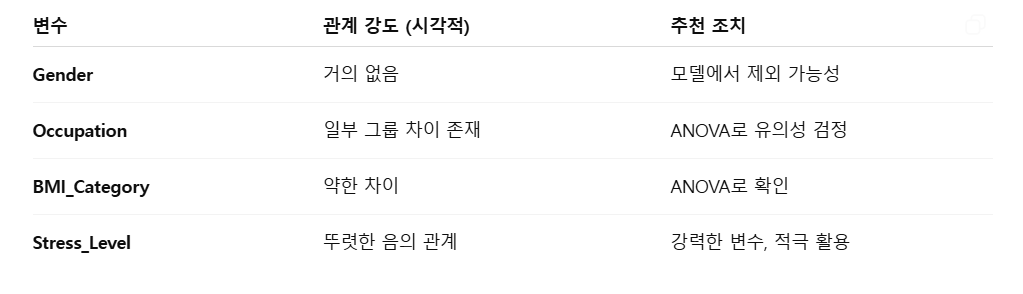

### 'Occupation' 컬럼의 ANOVA 분석

In [27]:
#!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------- -------------------------------- 1.8/9.8 MB 10.2 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.8 MB 11.0 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 11.3 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.8 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 11.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA를 위한 데이터 준비
# 'Quality_of_Sleep'을 종속 변수로, 'Occupation'을 독립 변수로 하는 모델 정의
# statsmodels의 ols 함수는 formula API를 사용하여 모델을 쉽게 정의할 수 있습니다.
# 'Occupation' 컬럼의 데이터 타입이 object이므로, 문자열로 처리되도록 ensure_ascii=False를 사용합니다.
# 또는 'Occupation' 컬럼을 category 타입으로 변환하여 사용할 수도 있습니다. 여기서는 간단히 문자열로 사용합니다.

# 모델 정의 (Quality_of_Sleep ~ C(Occupation) 형태로 지정하여 Occupation을 범주형으로 처리)
model = ols('Quality_of_Sleep ~ C(Occupation)', data=df_copy).fit()

# ANOVA 테이블 출력
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                     sum_sq      df          F         PR(>F)
C(Occupation)   1410.104307     4.0  214.26381  4.158957e-174
Residual       12007.325517  7298.0        NaN            NaN


p-value가 0에 매우 가까움. 따라서 'Occupation'(직업) 범주별로 'Quality_of_Sleep'(수면의 질)의 평균에 통계적으로 유의미한 차이가 있다고 결론

### 'BMI_Category' 컬럼의 ANOVA 분석

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA를 위한 데이터 준비
# 'Quality_of_Sleep'을 종속 변수로, 'BMI_Category'를 독립 변수로 하는 모델 정의
# BMI_Category 컬럼은 이미 숫자형이므로 C()로 감싸 범주형으로 처리합니다.

# 모델 정의 (Quality_of_Sleep ~ C(BMI_Category) 형태로 지정하여 BMI_Category를 범주형으로 처리)
model = ols('Quality_of_Sleep ~ C(BMI_Category)', data=df_copy).fit()

# ANOVA 테이블 출력
anova_table_bmi = sm.stats.anova_lm(model, typ=2)

print(anova_table_bmi)

                       sum_sq      df         F        PR(>F)
C(BMI_Category)    180.275605     2.0  49.70902  3.608534e-22
Residual         13237.154218  7300.0       NaN           NaN


p-value가 0에 매우 가까움. 따라서 'Occupation'(직업) 범주별로 'Quality_of_Sleep'(수면의 질)의 평균에 통계적으로 유의미한 차이가 있다고 결론

# 2단계 데이터 전처리 및 분할

## 원본 데이터 분리(Train-Test Split)

In [30]:
from sklearn.model_selection import train_test_split

# 특성 변수 (X)와 목표 변수 (y) 정의 (df_copy 사용)
X = df_copy.drop('Quality_of_Sleep', axis=1)
y = df_copy['Quality_of_Sleep']

# 데이터를 훈련 세트와 테스트 세트로 분할
# test_size는 테스트 세트의 비율 (예: 0.2는 20%)
# random_state는 결과를 재현하기 위한 시드값
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("훈련 세트 특성 (X_train) 형태:", X_train.shape)
print("테스트 세트 특성 (X_test) 형태:", X_test.shape)
print("훈련 세트 목표 변수 (y_train) 형태:", y_train.shape)
print("테스트 세트 목표 변수 (y_test) 형태:", y_test.shape)

훈련 세트 특성 (X_train) 형태: (5842, 10)
테스트 세트 특성 (X_test) 형태: (1461, 10)
훈련 세트 목표 변수 (y_train) 형태: (5842,)
테스트 세트 목표 변수 (y_test) 형태: (1461,)


In [31]:
display(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5842 entries, 565 to 7270
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5842 non-null   int64  
 1   Age             5842 non-null   int64  
 2   Occupation      5842 non-null   int64  
 3   Sleep_Duration  5842 non-null   float64
 4   Stress_Level    5842 non-null   int64  
 5   BMI_Category    5842 non-null   int64  
 6   Heart_Rate      5842 non-null   float64
 7   Systolic        5842 non-null   float64
 8   Diastolic       5842 non-null   float64
 9   MAP             5842 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 502.0 KB


None

In [32]:
X_train['Occupation'].unique()

array([4, 2, 1, 5, 3])

In [33]:
X_train['Occupation'] = X_train['Occupation'].astype(int)
X_train['Occupation'].unique()

array([4, 2, 1, 5, 3])

# 3단계 모델 학습을 위한 데이터 변환

## 1. 이상치 처리

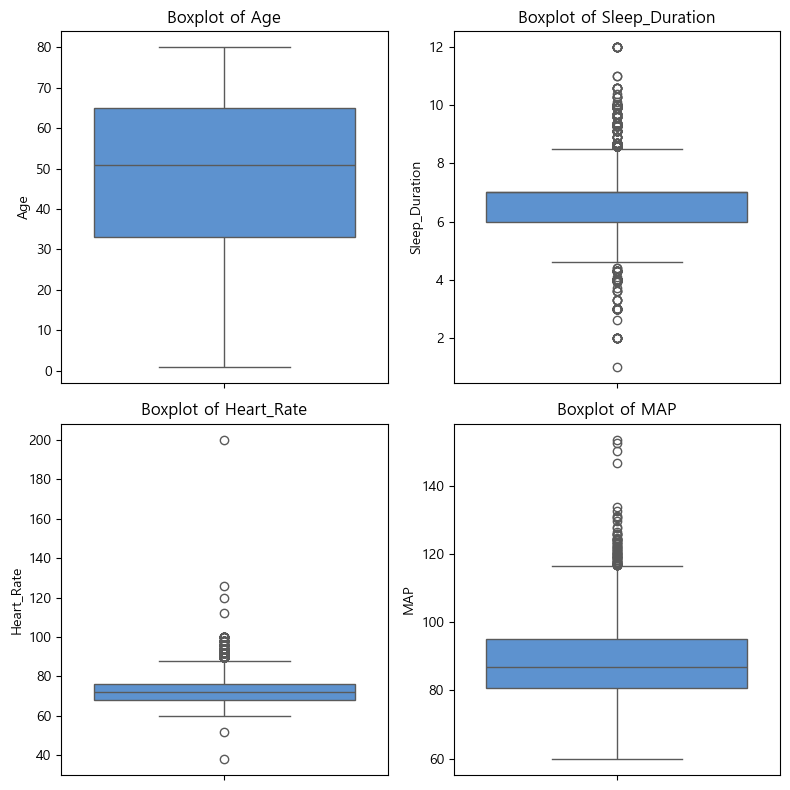

In [34]:
continuous_features = ['Age', 'Sleep_Duration', 'Heart_Rate', 'MAP']

# 2x2 격자로 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten() # 2D 배열을 1D 배열로 변환하여 쉽게 인덱싱

# 각 연속형 특성에 대해 박스플롯 그리기
for i, feature in enumerate(continuous_features):
    sns.boxplot(data=df_copy, y=feature, ax=axes[i], color='#4A90E2') # Use y for vertical boxplot
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel(feature)

# 서브플롯 간 간격 조절
plt.tight_layout()
plt.show()

* 박스 플롯 해석

| 변수                 | 상태                 | 권장                      |
|  ---------------  |  ---------------  |  --------------------  |
| Age                | 이상치 거의 없음          | 그대로 사용               |
| Sleep\_Duration    | 이상치(짧거나 긴 값) 다수    | clip/winsorize 추천    |
| Heart\_Rate        | 극단 이상치 다수          | 120 bpm 이상 제거 권장     |
| MAP                | 고혈압군 일부            | 값 확인 후 유지 or 극단값만 제한 |


## Heart_Rate 이상치 제거
* 120 bpm 이상 값은 데이터 오류 가능성도 있음 (심박수가 200은 비정상).

In [35]:
# 이상치 제거 전 데이터프레임 크기 확인
print("이상치 제거 전 df_copy 형태:", df_copy.shape)

# 'Heart_Rate' 컬럼에서 200 이상인 이상치 제거
df_copy_no_outliers = df_copy[df_copy['Heart_Rate'] < 200].copy()

# 이상치 제거 후 데이터프레임 크기 확인
print("이상치 제거 후 df_copy 형태:", df_copy_no_outliers.shape)

# 결과 확인 (제거된 행이 있는지)
display(df_copy[df_copy['Heart_Rate'] >= 200])

이상치 제거 전 df_copy 형태: (7303, 11)
이상치 제거 후 df_copy 형태: (7302, 11)


,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Stress_Level,BMI_Category,Heart_Rate,Systolic,Diastolic,MAP
3333,0,10,4,7.0,3,3,1,200.0,111.5,68.5,82.833333


In [36]:
print(df_copy_no_outliers.columns)

Index(['Gender', 'Age', 'Occupation', 'Sleep_Duration', 'Quality_of_Sleep',
       'Stress_Level', 'BMI_Category', 'Heart_Rate', 'Systolic', 'Diastolic',
       'MAP'],
      dtype='object')


* 'MAP'컬럼 생성으로 불필요해진 'Systolic', 'Diastolic' 컬럼 삭제

In [37]:
# 'Systolic'과 'Diastolic' 컬럼 삭제
df_processed = df_copy_no_outliers.drop(['Systolic', 'Diastolic'], axis=1).copy()

# 컬럼 확인
print(df_processed.columns)
display(df_processed.head())

Index(['Gender', 'Age', 'Occupation', 'Sleep_Duration', 'Quality_of_Sleep',
       'Stress_Level', 'BMI_Category', 'Heart_Rate', 'MAP'],
      dtype='object')


,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Stress_Level,BMI_Category,Heart_Rate,MAP
0,0,75,4,7.0,3,3,2,84.0,95.000000
1,1,70,4,6.0,2,3,1,60.0,99.666667
2,1,42,3,7.6,3,3,1,72.0,74.666667
3,1,52,4,7.0,3,3,1,86.0,87.666667
4,0,43,1,7.3,2,3,2,72.0,107.000000


## 2. 데이터 변환

## 다시 데이터 분할

In [40]:
df_processed = pd.read_csv('preprocessed_data.csv')
print("파일을 성공적으로 불러왔습니다. 데이터 일부 확인:")
print(df_processed.head())

파일을 성공적으로 불러왔습니다. 데이터 일부 확인:
   Gender  Age  Occupation  Sleep_Duration  Quality_of_Sleep  Stress_Level  \
0       0   75           4             7.0                 3             3   
1       1   70           4             6.0                 2             3   
2       1   42           3             7.6                 3             3   
3       1   52           4             7.0                 3             3   
4       0   43           1             7.3                 2             3   

   BMI_Category  Heart Rate_  Systolic  Diastolic  
0             2         84.0     142.0       71.5  
1             1         60.0     131.0       84.0  
2             1         72.0     103.0       60.5  
3             1         86.0     139.0       62.0  
4             2         72.0     131.0       95.0  


In [41]:
categorical_cols = ['Occupation', 'Gender', 'BMI_Category']
df_processed_encoded = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print("\n인코딩이 완료되어 'df_processed_encoded' 변수가 생성되었습니다. 데이터 일부 확인:")
print(df_processed_encoded.head())


인코딩이 완료되어 'df_processed_encoded' 변수가 생성되었습니다. 데이터 일부 확인:
   Age  Sleep_Duration  Quality_of_Sleep  Stress_Level  Heart Rate_  Systolic  \
0   75             7.0                 3             3         84.0     142.0   
1   70             6.0                 2             3         60.0     131.0   
2   42             7.6                 3             3         72.0     103.0   
3   52             7.0                 3             3         86.0     139.0   
4   43             7.3                 2             3         72.0     131.0   

   Diastolic  Occupation_2  Occupation_3  Occupation_4  Occupation_5  \
0       71.5         False         False          True         False   
1       84.0         False         False          True         False   
2       60.5         False          True         False         False   
3       62.0         False         False          True         False   
4       95.0         False         False         False         False   

   Gender_1  BMI_Categ

In [42]:
from sklearn.model_selection import train_test_split

# 특성 변수 (X_final)와 목표 변수 (y_final) 정의 (df_processed_encoded 사용)
X_final = df_processed_encoded.drop('Quality_of_Sleep', axis=1)
y_final = df_processed_encoded['Quality_of_Sleep']

# 전처리 완료된 데이터를 훈련 세트와 테스트 세트로 분할
# 이전과 동일한 test_size와 random_state 사용
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

print("최종 훈련 세트 특성 (X_train_final) 형태:", X_train_final.shape)
print("최종 테스트 세트 특성 (X_test_final) 형태:", X_test_final.shape)
print("최종 훈련 세트 목표 변수 (y_train_final) 형태:", y_train_final.shape)
print("최종 테스트 세트 목표 변수 (y_test_final) 형태:", y_test_final.shape)

최종 훈련 세트 특성 (X_train_final) 형태: (5842, 13)
최종 테스트 세트 특성 (X_test_final) 형태: (1461, 13)
최종 훈련 세트 목표 변수 (y_train_final) 형태: (5842,)
최종 테스트 세트 목표 변수 (y_test_final) 형태: (1461,)


## 스케일링
* 분류모델에서는 스케일링이 필수X
* 군집분석에서는 거리 기반이라서 무조건 스케일링 필요.(안 하면 왜곡이 심함)

In [45]:
X_train_final.columns

Index(['Age', 'Sleep_Duration', 'Stress_Level', 'Heart Rate_', 'Systolic',
       'Diastolic', 'Occupation_2', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Gender_1', 'BMI_Category_2', 'BMI_Category_3'],
      dtype='object')

In [46]:
# 평균 혈압 (MAP) 계산 및 컬럼 추가

# MAP = Diastolic + 1/3 * (Systolic - Diastolic)

X_train_final['MAP'] = X_train_final['Diastolic'] + (1/3) * (X_train_final['Systolic'] - X_train_final['Diastolic'])



# 결과 확인

display(X_train_final[['Systolic', 'Diastolic', 'MAP']].head())

display(X_train_final.info())



# 'Systolic'과 'Diastolic' 컬럼 삭제

X_train_final = X_train_final_no_outliers.drop(['Systolic', 'Diastolic'], axis=1).copy()



# 컬럼 확인

print(X_train_final.columns)

display(X_train_final.head())

,Systolic,Diastolic,MAP
565,101.0,74.0,83.000000
2716,114.5,67.0,82.833333
3859,100.5,65.5,77.166667
640,98.0,70.0,79.333333
3480,90.0,62.5,71.666667


<class 'pandas.core.frame.DataFrame'>
Index: 5842 entries, 565 to 7270
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             5842 non-null   int64  
 1   Sleep_Duration  5842 non-null   float64
 2   Stress_Level    5842 non-null   int64  
 3   Heart Rate_     5842 non-null   float64
 4   Systolic        5842 non-null   float64
 5   Diastolic       5842 non-null   float64
 6   Occupation_2    5842 non-null   bool   
 7   Occupation_3    5842 non-null   bool   
 8   Occupation_4    5842 non-null   bool   
 9   Occupation_5    5842 non-null   bool   
 10  Gender_1        5842 non-null   bool   
 11  BMI_Category_2  5842 non-null   bool   
 12  BMI_Category_3  5842 non-null   bool   
 13  MAP             5842 non-null   float64
dtypes: bool(7), float64(5), int64(2)
memory usage: 405.1 KB


None

NameError: name 'X_train_final_no_outliers' is not defined

In [43]:
from sklearn.preprocessing import StandardScaler

# 스케일링할 수치형 컬럼 선택 (원-핫 인코딩된 컬럼 제외)
numerical_cols_final = ['Age', 'Sleep_Duration', 'Stress_Level', 'BMI_Category', 'Heart_Rate', 'MAP']

# StandardScaler 초기화
scaler = StandardScaler()

# 훈련 세트의 수치형 컬럼에 대해 스케일러 학습 및 변환
X_train_final[numerical_cols_final] = scaler.fit_transform(X_train_final[numerical_cols_final])

# 테스트 세트의 수치형 컬럼 변환 (훈련 세트에서 학습된 스케일러 사용)
X_test_final[numerical_cols_final] = scaler.transform(X_test_final[numerical_cols_final])

print("스케일링 후 훈련 세트 특성 (X_train_final) head:")
display(X_train_final.head())

print("\n스케일링 후 테스트 세트 특성 (X_test_final) head:")
display(X_test_final.head())

KeyError: "['BMI_Category', 'Heart_Rate', 'MAP'] not in index"

## 불균형 확인 및 처리
*  SMOTE 오버샘플링

In [ ]:
display(y_train_final.value_counts().sort_index())

클래스 불균형이 존재함

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE 초기화 (random_state를 지정하여 결과 재현 가능하도록 설정)
smote = SMOTE(random_state=42)

# 훈련 데이터에 SMOTE 적용
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train_final)

print("SMOTE 적용 전 훈련 세트 형태:", X_train_final.shape)
print("SMOTE 적용 후 훈련 세트 형태:", X_train_resampled.shape)

print("\nSMOTE 적용 후 훈련 세트 클래스별 분포:")
display(y_train_resampled.value_counts().sort_index())

# 4단계 모델 학습 및 평가

##  모델을 사용하여 SMOTE 오버샘플링과 KFold 교차 검증
* KFold(SMOTE와 같은 전처리는 KFold의 각 반복 안에서 적용)
* KFold는 모델 학습 및 평가 단계에서 사용되며, SMOTE와 같은 전처리는 KFold의 각 반복 안에서 적용되어야 합니다.

## RandomForestClassifier 모델 학습

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 사용할 모델 정의 (랜덤 포레스트)
# Random Forest는 앙상블 모델이라 클래스 불균형에 비교적 강하지만, class_weight='balanced' 옵션도 고려해볼 수 있습니다.
model = RandomForestClassifier(random_state=42)

# SMOTE와 모델을 포함하는 파이프라인 생성
# SMOTE는 훈련 데이터에만 적용되고 모델은 파이프라인의 출력을 받아 학습됩니다.
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

# Stratified K-Fold 교차 검증 설정
# 분류 문제이므로 StratifiedKFold를 사용하여 각 폴드의 클래스 비율을 유지합니다.
# n_splits는 폴드의 개수 (일반적으로 5 또는 10)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 수행
# cross_val_score는 각 폴드에서의 점수를 반환합니다.
# scoring은 평가 지표를 지정합니다. 'accuracy' 외에 'f1_weighted' 등을 사용할 수 있습니다.
scores = cross_val_score(pipeline, X_train_final, y_train_final, cv=cv, scoring='accuracy')

print("각 폴드별 정확도:", scores)
print("평균 정확도:", scores.mean())
print("정확도 표준편차:", scores.std())

# 교차 검증 결과를 바탕으로 모델 학습 (선택 사항) 및 최종 평가
# 일반적으로 교차 검증으로 최적 모델/하이퍼파라미터를 찾은 후, 전체 훈련 데이터로 최종 모델을 학습합니다.
# 이 예시에서는 교차 검증 결과만 출력합니다.

## LightGBM 모델 학습

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
import lightgbm as lgb # Import LightGBM classifier
from sklearn.metrics import classification_report, accuracy_score

# 사용할 모델 정의 (LightGBM)
# objective를 'multiclass'로 설정하고 num_class를 타겟 클래스 수에 맞게 조정해야 합니다.
# LightGBM은 자체적으로 클래스 불균형 처리를 위한 scale_pos_weight 또는 is_unbalance 옵션을 제공하기도 합니다.
# 여기서는 SMOTE와 함께 사용하므로 기본 설정으로 진행합니다.
model = lgb.LGBMClassifier(objective='multiclass', num_class=len(y_train_final.unique()), random_state=42)

# SMOTE와 모델을 포함하는 파이프라인 생성
# SMOTE는 훈련 데이터에만 적용되고 모델은 파이프라인의 출력을 받아 학습됩니다.
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

# Stratified K-Fold 교차 검증 설정
# 분류 문제이므로 StratifiedKFold를 사용하여 각 폴드의 클래스 비율을 유지합니다.
# n_splits는 폴드의 개수 (일반적으로 5 또는 10)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 수행
# cross_val_score는 각 폴드에서의 점수를 반환합니다.
# scoring은 평가 지표를 지정합니다. 'accuracy' 외에 'f1_weighted' 등을 사용할 수 있습니다.
scores = cross_val_score(pipeline, X_train_final, y_train_final, cv=cv, scoring='accuracy')

print("각 폴드별 정확도:", scores)
print("평균 정확도:", scores.mean())
print("정확도 표준편차:", scores.std())

# 교차 검증 결과를 바탕으로 모델 학습 (선택 사항) 및 최종 평가
# 일반적으로 교차 검증으로 최적 모델/하이퍼파라미터를 찾은 후, 전체 훈련 데이터로 최종 모델을 학습합니다.
# 이 예시에서는 교차 검증 결과만 출력합니다.

### 랜덤포레스트 모델 학습곡선

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# 사용할 모델 정의 (랜덤 포레스트 - 이전 파이프라인에서 사용된 설정 활용)
model = RandomForestClassifier(random_state=42)

# SMOTE와 모델을 포함하는 파이프라인 생성
# 학습 곡선 계산 시 작은 훈련 세트 크기에서도 SMOTE가 작동하도록 k_neighbors를 조정합니다.
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, k_neighbors=1)), # Set k_neighbors to a small value like 1
    ('classifier', model)
])

# Stratified K-Fold 교차 검증 설정 (학습 곡선 계산 내부에서 사용)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 학습 곡선 계산
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=pipeline,
    X=X_train_final,
    y=y_train_final,
    cv=cv,
    train_sizes=np.linspace(0.1, 1.0, 10), # 훈련 세트 크기를 10단계로 나눔
    scoring='accuracy',
    n_jobs=-1 # 사용할 CPU 코어 수
)

# 훈련 점수와 검증 점수의 평균 및 표준편차 계산
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# 학습 곡선 시각화
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves (Random Forest with SMOTE)")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

### LightGBN모델 학습 곡선

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import lightgbm as lgb # Import LightGBM classifier
from sklearn.model_selection import StratifiedKFold

# 사용할 모델 정의 (LightGBM - 이전 파이프라인에서 사용된 설정 활용)
# 학습 곡선 계산을 위해 파이프라인을 다시 정의합니다.
model = lgb.LGBMClassifier(objective='multiclass', num_class=len(y_train_final.unique()), random_state=42)

# SMOTE와 모델을 포함하는 파이프라인 생성
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

# Stratified K-Fold 교차 검증 설정 (학습 곡선 계산 내부에서 사용)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 학습 곡선 계산
# estimator: 학습 곡선을 계산할 모델 또는 파이프라인
# X, y: 훈련 데이터 (SMOTE는 학습 곡선 계산 내부에서 각 훈련 데이터 크기에 맞춰 적용됨)
# cv: 교차 검증 전략
# train_sizes: 학습 곡선을 계산할 훈련 세트 크기 비율 또는 절대 크기
# scoring: 모델 평가 지표
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=pipeline,
    X=X_train_final,
    y=y_train_final,
    cv=cv,
    train_sizes=np.linspace(0.1, 1.0, 10), # 훈련 세트 크기를 10단계로 나눔
    scoring='accuracy',
    n_jobs=-1 # 사용할 CPU 코어 수
)

# 훈련 점수와 검증 점수의 평균 및 표준편차 계산
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# 학습 곡선 시각화
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves (LightGBM with SMOTE)")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## 모델 학습

In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

# 사용할 모델 정의 (LightGBM - 교차 검증에서 사용했던 설정 활용)
# 최종 모델 학습 시에는 파이프라인 없이 모델만 사용하거나,
# SMOTE를 전체 훈련 데이터에 적용한 후 모델을 학습할 수 있습니다.
# 여기서는 SMOTE가 적용된 X_train_resampled, y_train_resampled를 사용합니다.
final_model = lgb.LGBMClassifier(objective='multiclass', num_class=len(y_train_final.unique()), random_state=42)

# 최종 모델 학습 (SMOTE가 적용된 전체 훈련 데이터 사용)
final_model.fit(X_train_resampled, y_train_resampled)

# 테스트 데이터로 예측 수행
y_pred = final_model.predict(X_test_final)

# 모델 성능 평가
print("LightGBM 모델 최종 평가 결과:")
print("정확도 (Accuracy):", accuracy_score(y_test_final, y_pred))
print("\n분류 보고서 (Classification Report):")
print(classification_report(y_test_final, y_pred))

In [ ]:
# LightGBM 모델의 특성 중요도 추출
feature_importances = final_model.feature_importances_

# 특성 이름 가져오기
feature_names = X_train_resampled.columns # 또는 X_train_final.columns 사용

# 특성 중요도를 데이터프레임으로 만들고 정렬
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('LightGBM Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 군집

필요 없는 데이터 제거

In [ ]:
# [핵심]: 군집 분석에는 이상치를 제거하지 않은 '원본 df'를 사용합니다.
# 'Quality of Sleep' 컬럼 제거 (군집화 대상이 아니므로)/'Sleep_Duration'컬럼 역시 제거 다른 요인들을 심층적으로 분석하기 위해서.
X_cluster = df.drop(columns=['Sleep_Duration', 'Quality_of_Sleep', 'gubun','Sleep Disorder'], errors='ignore') # 'gubun' 컬럼을 X_cluster에서 제거합니다.

In [ ]:
X_cluster

수축 혈압과 이완 혈압의 평균을 내어 새로운 컬럼 생성 MAS

In [ ]:
# 평균 혈압 (MAP) 계산 및 컬럼 추가
# MAP = Diastolic + 1/3 * (Systolic - Diastolic)
X_cluster['MAP'] = X_cluster['Diastolic'] + (1/3) * (X_cluster['Systolic'] - X_cluster['Diastolic'])

# 결과 확인
display(X_cluster[['Systolic', 'Diastolic', 'MAP']].head())
display(X_cluster.info())

# 'Systolic'과 'Diastolic' 컬럼 삭제
X_cluster = X_cluster.drop(['Systolic', 'Diastolic'], axis=1)

# 컬럼 확인
print(X_cluster.columns)
display(X_cluster.head())

In [ ]:
X_cluster

## 순수 수치형 컬럼, 레이블 인코딩된 범주형 컬럼 명확히 구분

In [ ]:
#    - 'Gender', 'Occupation', 'BMI Category'는 레이블 인코딩된 범주형입니다.
#    - 나머지는 순수 수치형입니다.
label_encoded_categorical_cols = ['Gender', 'Occupation', 'BMI Category'] # 레이블 인코딩된 범주형 컬럼 목록

## 순수 수치형 컬럼만 스케일링

In [ ]:
numerical_cols_for_clustering = [
    col for col in X_cluster.columns
    if col not in label_encoded_categorical_cols and X_cluster[col].dtype in [np.int64, np.float64] # 숫자 타입 확인 추가
]

scaler = StandardScaler()
X_cluster_scaled = X_cluster.copy() # 원본 X_cluster 변경 방지 (스케일링 결과를 새 변수에 저장)
X_cluster_scaled[numerical_cols_for_clustering] = scaler.fit_transform(X_cluster_scaled[numerical_cols_for_clustering])
print("\n군집 분석을 위한 순수 수치형 데이터 스케일링 완료.")


## 클러스터링 수행

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto') # n_init='auto' 권장 설정
# 스케일링된 데이터로 군집화합니다. (X_cluster_scaled 사용)
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

# [수정사항]: 군집 결과를 X_cluster에 'Cluster' 컬럼으로 추가하고, 이 결과를 다시 원본 df에도 병합합니다.
X_cluster['Cluster'] = cluster_labels
df['Cluster'] = cluster_labels # 원본 df에 클러스터 결과 병합 (이후 recommend_sleep 등 분석에서 활용)
print("\n군집 분석 완료. 원본 df에 'Cluster' 컬럼 추가됨.")

## 실루엣 스코어 확인

In [ ]:

def my_chart(cluster_lists, X):

    fig, axs = plt.subplots(figsize=(4*len(cluster_lists), 4),
                            nrows=1,
                            ncols=len(cluster_lists))

    for ind, k in enumerate(cluster_lists):

        kmeans = KMeans(n_clusters=k, max_iter=500, random_state=1111)
        cluster_labels = kmeans.fit_predict(X)

        sil_coef_mean = silhouette_score(X, cluster_labels)
        sil_coef      = silhouette_samples(X, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(k)+'\n' \
                          'Silhouette Score :' + str(round(sil_coef_mean,3)) )

        axs[ind].set_xlabel("silhouette coefficient")
        axs[ind].set_ylabel("cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X) + (k + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 막대 그래프
        for i in range(k):
            ith_cluster_sil_coef = sil_coef[cluster_labels==i]
            ith_cluster_sil_coef.sort()

            size_cluster_i = ith_cluster_sil_coef.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / k)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_coef, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_coef_mean, color="red", linestyle="--")

# 호출할 때
plt.tight_layout()
plt.show() # 생성된 차트를 화면에 표시합니다.
my_chart([2,3,4,5], X_cluster_scaled )


## 엘보차트 그리기

In [ ]:
# [설명]: K-Means에서 최적의 군집 개수(k)를 찾기 위한 엘보 차트를 그립니다.

# 군집 개수(k) 범위 설정
max_k = 10 # 테스트할 최대 군집 개수
sse = [] # 각 k에 대한 SSE(Sum of Squared Errors) 값을 저장할 리스트

# 각 k 값에 대해 K-Means 수행 및 SSE 계산
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_cluster_scaled) # 스케일링된 데이터 사용
    sse.append(kmeans.inertia_) # inertia_ 속성이 SSE 값입니다.

# 엘보 차트 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), sse, marker='o', linestyle='--')
plt.title('Elbow Method', fontsize=15)
plt.xlabel('k', fontsize=12)
plt.ylabel('SSE (Sum of Squared Errors / Inertia)', fontsize=12)
plt.xticks(range(1, max_k + 1)) # x축 눈금 설정
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n엘보 차트가 생성되었습니다. SSE 값이 급격히 줄어들다가 완만해지는 '팔꿈치' 지점을 찾아보세요.")

## 군집 결과 시각화 (박스플롯)

In [ ]:
# [설명]: 원본 df에 추가된 'Cluster' 컬럼을 기준으로 박스플롯을 그립니다.
cols_to_plot_after_cluster = ['Heart_Rate', 'Age', 'Stress_Level'] # 시각화할 피처 목록 (컬럼명 수정)
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot_after_cluster), figsize=(len(cols_to_plot_after_cluster)*6, 6))

if len(cols_to_plot_after_cluster) == 1:
    axes = [axes] # 컬럼이 하나일 경우 axes가 단일 객체이므로 리스트로 감싸서 반복문 사용 가능하게 함

for i, col in enumerate(cols_to_plot_after_cluster):
    sns.boxplot(x="Cluster", y=col, data=df, ax=axes[i], palette='viridis', hue='Cluster', legend=False)
    axes[i].set_title(f"군집별 {col} 분포", fontsize=12)
    axes[i].set_xlabel("군집", fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)
plt.tight_layout()
plt.show() # 차트 표시

## 다양한 K 값에 따른 2D 군집 산점도 시각화

In [ ]:
# [설명]: k=3, 4, 5일 때 각각 PCA를 이용한 2차원 산점도를 그려 군집 응집도를 시각적으로 비교합니다.
from sklearn.decomposition import PCA # PCA 임포트 (상단에 이미 임포트되어 있어야 함)

# 테스트할 k 값 리스트
k_values_to_plot = [3, 4, 5]

# 각 k 값에 대해 산점도 그리기
for k in k_values_to_plot:
    # 1. K-Means 군집화 수행 (스케일링된 데이터 X_cluster_scaled 사용)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_cluster_scaled)

    # 2. 실루엣 점수 계산 (응집도 지표)
    silhouette_avg = silhouette_score(X_cluster_scaled, cluster_labels)

    # 3. PCA를 이용해 2차원으로 차원 축소 (군집화에 사용했던 스케일링된 데이터 사용)
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_cluster_scaled)

    # 4. PCA 결과와 군집 라벨을 포함하는 데이터프레임 생성
    # X_pca의 첫 번째 주성분을 'PC1', 두 번째 주성분을 'PC2'로 이름 붙입니다.
    # 'Cluster' 정보는 해당 k값의 cluster_labels를 사용합니다.
    pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    pca_df['Cluster'] = cluster_labels # 해당 k값의 클러스터 라벨을 pca_df에 추가

    # 5. 군집별 산점도 시각화
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df,
                    palette='viridis', s=100, alpha=0.7,
                    legend='full') # 'legend=full'로 범례를 명확하게 표시

    plt.title(f'PCA 2D Scatter: K={k} 군집별 분포 (Silhouette Score: {silhouette_avg:.3f})', fontsize=12)
    plt.xlabel('주성분 1 (PC1)', fontsize=9)
    plt.ylabel('주성분 2 (PC2)', fontsize=9)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show() # 차트를 주피터에 표시

print("\nK=3, 4, 5일 때의 PCA 2D 산점도가 각각 생성되었습니다. 각 군집의 응집도와 분리도를 시각적으로 비교해보세요.")

## 군집 결과 분석 및 시각화

In [ ]:
print("\n--- 군집별 평균 특성 (원본 df 기준) ---")
# [설명]: Cluster 컬럼이 추가된 원본 df를 사용하여 군집별 평균 특성을 확인합니다.
# 모든 컬럼에 대해 평균을 볼 수 있지만, 의미 있는 수치형 컬럼 위주로 보는 것이 좋습니다.
display(df.groupby('Cluster').mean(numeric_only=True)) # numeric_only=True 추가하여 경고 방지


# ✔ 방법 1. 범주형 컬럼들의 최빈값(mode) 보기
# [수정사항]: df를 사용하고, cluster_mode는 df의 컬럼 기준으로 생성
# 최빈값은 모든 컬럼 (수치형, 레이블 인코딩된 범주형)에 대해 볼 수 있습니다.
cluster_mode = df.groupby('Cluster').agg(lambda x: x.mode().iloc[0])
print("\n--- 군집별 특성 최빈값 (전체) ---")
pd.set_option('display.max_columns', None) # 모든 컬럼을 표시하도록 설정
display(cluster_mode)

## 범주형 변수의 비율 분석

In [ ]:
print("\n--- 군집별 범주형 변수 비율 분포 ---")
# [수정사항]: 원본 df의 'Gender', 'Occupation', 'BMI Category' 컬럼만 명시적으로 사용
# 이 컬럼들은 LabelEncoder로 이미 숫자로 변환되어 있습니다.
display_categorical_cols = ['Gender', 'Occupation', 'BMI Category'] # 분석하고 싶은 원래 범주형 컬럼들을 명시적으로 지정
for col in display_categorical_cols:
    if col in df.columns: # 컬럼이 df에 있는지 확인하는 안전 장치
        print(f'\n[📊 {col} 비율 분포]')
        # pd.crosstab 사용 시 df['Cluster']와 df[col] 모두 숫자이므로 정상 작동
        print(pd.crosstab(df['Cluster'], df[col], normalize='index'))

# Streamlit 대시보드를 만들기

In [ ]:

# 시각화할 변수 리스트
features_to_plot = ['Age', 'Stress_Level', 'Heart_Rate']

# 격자(Grid) 설정: 2행 3열
rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    # ★★ 핵심 수정 사항 ★★
    # 원본 df가 아닌, 이상치를 제거하고 Cluster 컬럼이 추가된 'df_clean'을 사용합니다.
    if feature in df.columns:
        ax = axes[i]
        sns.boxplot(x='Cluster', y=feature, data=df, ax=ax) # <--- 이 부분을 df_clean으로 변경!
        ax.set_title(f'Cluster별 {feature} 분포')
        ax.set_xlabel('Cluster')
        ax.set_ylabel(feature)

# 남는 subplot이 있다면 숨김 처리
for j in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.show()

## Streamlit 대시보드 구현

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # KMeans를 사용할 경우 import 필요

# df는 이전 단계에서 'Cluster' 컬럼이 추가된 DataFrame이라고 가정합니다.

st.title('수면 건강 맞춤형 군집 분석 대시보드')

st.write("""
사용자들의 건강 데이터를 바탕으로 **4개의 그룹**으로 군집화한 결과입니다.
아래에서 관심 있는 그룹을 선택하여 상세 특징을 확인하고 맞춤형 건강 솔루션을 얻어보세요.
""")

# 군집 선택 박스
# df['Cluster'].unique()는 현재 df에 있는 군집 ID를 자동으로 가져옵니다.
cluster_option = st.selectbox('분석할 군집을 선택하세요:', sorted(df['Cluster'].unique()))

def recommend_sleep(cluster_id):
    if cluster_id == 0:
        return (
            "이 그룹은 비교적 젊은 연령대이며, **수면의 질과 스트레스 관리가 매우 우수한 건강한 군집**입니다. "
            "대부분 정상 체중을 유지하고 심박수와 혈압도 안정적입니다. "
            "현재의 좋은 습관을 계속 유지하고, **주기적인 건강 검진과 자신에게 맞는 꾸준한 신체 활동**으로 건강을 더욱 견고히 다지는 것을 추천합니다."
        )
    elif cluster_id == 1:
        return (
            "이 그룹은 **높은 혈압과 비만도가 특징인 남성 위주의 군집**입니다. "
            "신체 활동 수준은 높은 편이지만, 심혈관 건강에 각별한 주의가 필요합니다. "
            "**나트륨 섭취를 줄이고 칼륨이 풍부한 식품을 섭취하는 식단 개선**이 시급하며, "
            "의료 전문가와 상담하여 혈압과 체중을 관리하는 계획을 세우는 것이 중요합니다. "
            "스트레스 관리 또한 병행되어야 합니다."
        )
    elif cluster_id == 2:
        return (
            "이 그룹은 **젊은 여성의 비율이 높고 스트레스 수준이 높은 것이 특징**입니다. "
            "수면의 질은 평균 수준이지만, 만성적인 스트레스가 건강에 영향을 미칠 수 있습니다. "
            "**명상, 요가, 취미 활동 등 스트레스 해소에 도움이 되는 활동**을 일상에 추가하고, "
            "**규칙적인 수면 시간 확보와 잠자리 환경 개선**을 통해 수면의 질을 높이는 데 집중하는 것을 추천합니다."
        )
    elif cluster_id == 3:
        return (
            "이 그룹은 **수면의 질이 가장 낮고, 신체 활동 수준이 부족하며, 스트레스와 비만도가 높은 복합적인 건강 문제를 가진 군집**입니다. "
            "다양한 직업군에 분포하며, 전반적인 생활 습관 개선이 필요합니다. "
            "**매일 가벼운 산책이나 스트레칭부터 시작하여 점진적으로 활동량을 늘리고**, "
            "**잠들기 전 전자기기 사용 자제, 규칙적인 수면 루틴**을 만드는 것이 중요합니다. "
            "전문가와 상담하여 체계적인 스트레스 및 체중 관리 계획을 세우는 것도 좋은 방법입니다."
        )
    else:
        return "선택된 군집에 대한 분석 정보가 없습니다. 0에서 3까지의 군집을 선택해주세요."

# df에 'Recommendation' 컬럼 추가 (Streamlit 앱 실행 전에 이 부분이 실행되어야 함)
df['Recommendation'] = df['Cluster'].apply(recommend_sleep)

# Streamlit 앱에서 선택된 군집의 특성과 추천 메시지를 표시
# 실제 대시보드에서는 이 부분이 st.write 등으로 연결될 것입니다.
# 예를 들어:
# st.write(f"### 선택된 군집 {cluster_option}의 특징:")
# selected_cluster_data = df[df['Cluster'] == cluster_option].drop(columns=['Cluster', 'Recommendation'], errors='ignore').mean(numeric_only=True)
# st.write(selected_cluster_data)
# st.write(f"### 맞춤형 추천:")
# st.write(df[df['Cluster'] == cluster_option]['Recommendation'].iloc[0])


# plt.show()는 Streamlit 앱에서는 직접적으로 차트를 표시하지 않으므로,
# 실제 Streamlit 코드에서는 st.pyplot(fig)와 같은 방식으로 차트를 통합해야 합니다.
# 이 코드 스니펫은 함수 정의와 컬럼 추가에 중점을 둡니다.

In [ ]:
#!pip install streamlit

## 군집별 박스 플롯 시각화

In [ ]:
# # 군집별 박스 플롯 시각화
# st.header("군집별 주요 건강 지표 분포 비교")

features_to_plot = ['Age', 'Stress_Level', 'Heart_Rate']

# 격자(Grid) 설정: 2행 3열
rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    sns.boxplot(x='Cluster', y=feature, data=df, ax=ax)
    ax.set_title(f'Cluster별 {feature} 분포', fontsize=14)
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel(feature, fontsize=12)

plt.tight_layout()

# 완성된 전체 그림(fig)을 대시보드에 출력
# st.pyplot(fig)
plt.show() # 차트 표시
